In [1]:
import os

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import f1_score

from sklearn.linear_model import LogisticRegression
import sklearn

from imblearn.ensemble import BalancedRandomForestClassifier

N_SPLITS = 4
skf = StratifiedKFold(n_splits=N_SPLITS, random_state=21, shuffle=True)

In [ ]:
df = pd.read_csv("data/extravasation_serieses_no_tta.csv")

for i, scores in enumerate(df.scores):
    df.scores[i] = np.array(scores.strip('][').split(', '), dtype = np.float32)
for i, squares in enumerate(df.squares):
    df.squares[i] = np.array(squares.strip('][').split(', '), dtype = np.float32)

In [3]:
train = pd.read_csv("data/train.csv")

inj = []
for pid in df.patient_id:
    inj.append(train[train.patient_id == pid].extravasation_injury.item())
df["label"] = inj

In [4]:
pids = df.patient_id.unique()
labels = []
for p in pids:
    labels.append(df[df.patient_id == p].label.max())
df["fold"] = 0
for i, (train_index, test_index) in enumerate(skf.split(pids, labels)):
    print(f"Fold {i}:")
    ids = pids[test_index]
    df['fold'] = df.apply(lambda x: i if x.patient_id in ids else x.fold, axis=1)

Fold 0:
Fold 1:
Fold 2:
Fold 3:


In [5]:
df.head()

,patient_id,scores,squares,label,fold
0,10004,"[0.0, 0.0, 0.0, 0.0, 0.1479014, 0.37721756, 0....","[0.0, 0.0, 0.0, 0.0, 0.0030940247, 0.003185323...",1,2
1,10005,"[0.0, 0.0, 0.0, 0.0, 0.12832211, 0.0, 0.0, 0.1...","[0.0, 0.0, 0.0, 0.0, 0.0018373762, 0.0, 0.0, 0...",0,2
2,10007,"[0.0, 0.23841752, 0.13442855, 0.41050658, 0.36...","[0.0, 0.00395162, 0.010639566, 0.013266009, 0....",0,2
3,10026,"[0.0, 0.0, 0.0, 0.20910661, 0.0, 0.0, 0.0, 0.0...","[0.0, 0.0, 0.0, 0.0040258053, 0.0, 0.0, 0.0, 0...",0,1
4,10051,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.354...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.003...",0,3


In [6]:
df["scores_mean"] = df.scores.transform(lambda x: x[x!=0.0].mean())
df["scores_max"] = df.scores.transform(lambda x: x.max())
df["scores_max_index"] = df.scores.transform(lambda x: np.argmax(x) / len(x))
df["scores_second_max"] = df.scores.transform(lambda x: x[x!=x.max()].max())
df["scores_min"] = df.scores.transform(lambda x: x[x!=0.0].min())
df["scores_median"] = df.scores.transform(lambda x: np.median(x[x!=0.0]))
df["shape"] = df.scores.transform(lambda x: len(x) / 500) #max(len(x))=480
df["scores_len_not_null_normalized"] = df.scores.transform(lambda x: len(x[x!=0.0]) / len(x))
df["scores_std"] = df.scores.transform(lambda x: x.std())
df["scores_std_not_null"] = df.scores.transform(lambda x: x[x!=0.0].std())

df["scores_window_5_mean"] = df.scores.transform(lambda x: x[max(np.argmax(x) - 5, 0) : min(np.argmax(x) + 6, len(x))].mean())
df["scores_window_5_min"] = df.scores.transform(lambda x: x[max(np.argmax(x) - 5, 0) : min(np.argmax(x) + 6, len(x))].min())
df["scores_window_5_min_not_null"] = df.scores.transform(lambda x: x[max(np.argmax(x) - 5, 0) : min(np.argmax(x) + 6, len(x))][x[max(np.argmax(x) - 5, 0) : min(np.argmax(x) + 6, len(x))]!=0.0].min())
df["scores_window_5_median"] = df.scores.transform(lambda x: np.median(x[max(np.argmax(x) - 5, 0) : min(np.argmax(x) + 6, len(x))]))
df["scores_window_5_std"] = df.scores.transform(lambda x: x[max(np.argmax(x) - 5, 0) : min(np.argmax(x) + 6, len(x))].std())

df["scores_window_2_mean"] = df.scores.transform(lambda x: x[max(np.argmax(x) - 2, 0) : min(np.argmax(x) + 3, len(x))].mean())
df["scores_window_2_min"] = df.scores.transform(lambda x: x[max(np.argmax(x) - 2, 0) : min(np.argmax(x) + 3, len(x))].min())
df["scores_window_2_min_not_null"] = df.scores.transform(lambda x: x[max(np.argmax(x) - 2, 0) : min(np.argmax(x) + 3, len(x))][x[max(np.argmax(x) - 2, 0) : min(np.argmax(x) + 3, len(x))]!=0.0].min())
df["scores_window_2_median"] = df.scores.transform(lambda x: np.median(x[max(np.argmax(x) - 2, 0) : min(np.argmax(x) + 3, len(x))]))
df["scores_window_2_std"] = df.scores.transform(lambda x: x[max(np.argmax(x) - 2, 0) : min(np.argmax(x) + 3, len(x))].std())

df["scores_window_10_mean"] = df.scores.transform(lambda x: x[max(np.argmax(x) - 10, 0) : min(np.argmax(x) + 11, len(x))].mean())
df["scores_window_10_min"] = df.scores.transform(lambda x: x[max(np.argmax(x) - 10, 0) : min(np.argmax(x) + 11, len(x))].min())
df["scores_window_10_min_not_null"] = df.scores.transform(lambda x: x[max(np.argmax(x) - 10, 0) : min(np.argmax(x) + 11, len(x))][x[max(np.argmax(x) - 10, 0) : min(np.argmax(x) + 11, len(x))]!=0.0].min())
df["scores_window_10_median"] = df.scores.transform(lambda x: np.median(x[max(np.argmax(x) - 10, 0) : min(np.argmax(x) + 11, len(x))]))
df["scores_window_10_std"] = df.scores.transform(lambda x: x[max(np.argmax(x) - 10, 0) : min(np.argmax(x) + 11, len(x))].std())

In [7]:
df["squares_mean"] = df.squares.transform(lambda x: x[x!=0.0].mean())
df["squares_max"] = df.squares.transform(lambda x: x.max())
df["squares_second_max"] = df.squares.transform(lambda x: x[x!=x.max()].max())
df["squares_max_index"] = df.squares.transform(lambda x: np.argmax(x) / len(x))
df["squares_min"] = df.squares.transform(lambda x: x[x!=0.0].min())
df["squares_median"] = df.squares.transform(lambda x: np.median(x[x!=0.0]))
df["squares_len_not_null_normalized"] = df.squares.transform(lambda x: len(x[x!=0.0]) / len(x))
df["squares_std"] = df.squares.transform(lambda x: x.std())
df["squares_std_not_null"] = df.squares.transform(lambda x: x[x!=0.0].std())

df["squares_window_5_mean"] = df.squares.transform(lambda x: x[max(np.argmax(x) - 5, 0) : min(np.argmax(x) + 6, len(x))].mean())
df["squares_window_5_min"] = df.squares.transform(lambda x: x[max(np.argmax(x) - 5, 0) : min(np.argmax(x) + 6, len(x))].min())
df["squares_window_5_min_not_null"] = df.squares.transform(lambda x: x[max(np.argmax(x) - 5, 0) : min(np.argmax(x) + 6, len(x))][x[max(np.argmax(x) - 5, 0) : min(np.argmax(x) + 6, len(x))]!=0.0].min())
df["squares_window_5_median"] = df.squares.transform(lambda x: np.median(x[max(np.argmax(x) - 5, 0) : min(np.argmax(x) + 6, len(x))]))
df["squares_window_5_std"] = df.squares.transform(lambda x: x[max(np.argmax(x) - 5, 0) : min(np.argmax(x) + 6, len(x))].std())

df["squares_window_2_mean"] = df.squares.transform(lambda x: x[max(np.argmax(x) - 2, 0) : min(np.argmax(x) + 3, len(x))].mean())
df["squares_window_2_min"] = df.squares.transform(lambda x: x[max(np.argmax(x) - 2, 0) : min(np.argmax(x) + 3, len(x))].min())
df["squares_window_2_min_not_null"] = df.squares.transform(lambda x: x[max(np.argmax(x) - 2, 0) : min(np.argmax(x) + 3, len(x))][x[max(np.argmax(x) - 2, 0) : min(np.argmax(x) + 3, len(x))]!=0.0].min())
df["squares_window_2_median"] = df.squares.transform(lambda x: np.median(x[max(np.argmax(x) - 2, 0) : min(np.argmax(x) + 3, len(x))]))
df["squares_window_2_std"] = df.squares.transform(lambda x: x[max(np.argmax(x) - 2, 0) : min(np.argmax(x) + 3, len(x))].std())

df["squares_window_10_mean"] = df.squares.transform(lambda x: x[max(np.argmax(x) - 10, 0) : min(np.argmax(x) + 11, len(x))].mean())
df["squares_window_10_min"] = df.squares.transform(lambda x: x[max(np.argmax(x) - 10, 0) : min(np.argmax(x) + 11, len(x))].min())
df["squares_window_10_min_not_null"] = df.squares.transform(lambda x: x[max(np.argmax(x) - 10, 0) : min(np.argmax(x) + 11, len(x))][x[max(np.argmax(x) - 10, 0) : min(np.argmax(x) + 11, len(x))]!=0.0].min())
df["squares_window_10_median"] = df.squares.transform(lambda x: np.median(x[max(np.argmax(x) - 10, 0) : min(np.argmax(x) + 11, len(x))]))
df["squares_window_10_std"] = df.squares.transform(lambda x: x[max(np.argmax(x) - 10, 0) : min(np.argmax(x) + 11, len(x))].std())

In [8]:
df["scores_mean_log"] = df.scores_mean.transform(lambda x: np.log(x))
df["scores_max_log"] = df.scores_max.transform(lambda x: np.log(x))
df["scores_second_max_log"] = df.scores_second_max.transform(lambda x: np.log(x))
df["scores_min_log"] = df.scores_min.transform(lambda x: np.log(x))
df["scores_median_log"] = df.scores_median.transform(lambda x: np.log(x))
df["scores_len_not_null_normalized_log"] = df.scores_len_not_null_normalized.transform(lambda x: np.log(x))
df["scores_std_log"] = df.scores_std.transform(lambda x: np.log(x))
df["scores_std_not_null_log"] = df.scores_std_not_null.transform(lambda x: np.log(x))

df["scores_window_5_mean_log"] = df.scores_window_5_mean.transform(lambda x: np.log(x))
df["scores_window_5_min_log"] = df.scores_window_5_min.transform(lambda x: np.log(x))
df["scores_window_5_min_not_null_log"] = df.scores_window_5_min_not_null.transform(lambda x: np.log(x))
df["scores_window_5_median_log"] = df.scores_window_5_median.transform(lambda x: np.log(x))
df["scores_window_5_std_log"] = df.scores_window_5_std.transform(lambda x: np.log(x))

df["scores_window_2_mean_log"] = df.scores_window_2_mean.transform(lambda x: np.log(x))
df["scores_window_2_min_log"] = df.scores_window_2_min.transform(lambda x: np.log(x))
df["scores_window_2_min_not_null_log"] = df.scores_window_2_min_not_null.transform(lambda x: np.log(x))
df["scores_window_2_median_log"] = df.scores_window_2_median.transform(lambda x: np.log(x))
df["scores_window_2_std_log"] = df.scores_window_2_std.transform(lambda x: np.log(x))

df["scores_window_10_mean_log"] = df.scores_window_10_mean.transform(lambda x: np.log(x))
df["scores_window_10_min_log"] = df.scores_window_10_min.transform(lambda x: np.log(x))
df["scores_window_10_min_not_null_log"] = df.scores_window_10_min_not_null.transform(lambda x: np.log(x))
df["scores_window_10_median_log"] = df.scores_window_10_median.transform(lambda x: np.log(x))
df["scores_window_10_std_log"] = df.scores_window_10_std.transform(lambda x: np.log(x))

In [9]:
df["delta_index"] = df.apply(lambda x: x.squares_max_index - x.scores_max_index, axis=1)
df["dev_index"] = df.apply(lambda x: x.squares_max_index / (x.scores_max_index + 1e-5), axis=1)
df["dev_scores_squares"] = df.apply(lambda x: x.squares_max / (x.scores_max + 1e-5), axis=1)

In [10]:
df["scores_count_0.05"] = df.scores.transform(lambda x: len(x[x >= (x.max() - 0.05)]))
df["scores_count_0.1"] = df.scores.transform(lambda x: len(x[x >= (x.max() - 0.1)]))
df["scores_count_0.15"] = df.scores.transform(lambda x: len(x[x >= (x.max() - 0.15)]))
df["scores_count_0.2"] = df.scores.transform(lambda x: len(x[x >= (x.max() - 0.2)]))

df["squares_count_0.05"] = df.squares.transform(lambda x: len(x[x >= (x.max() - 0.05)]))
df["squares_count_0.1"] = df.squares.transform(lambda x: len(x[x >= (x.max() - 0.1)]))
df["squares_count_0.15"] = df.squares.transform(lambda x: len(x[x >= (x.max() - 0.15)]))
df["squares_count_0.2"] = df.squares.transform(lambda x: len(x[x >= (x.max() - 0.2)]))

In [11]:
df["scores_diff"] = df.scores.transform(lambda x: np.diff(x))
df["squares_diff"] = df.squares.transform(lambda x: np.diff(x))

In [12]:
def f1(x):
    x = np.array(x)
    mask = np.logical_and(x > -0.05, x < 0.05)
    return mask.sum() - 1

def f2(x):
    x = np.array(x)
    mask = np.logical_and(x >= -0.01, x <= 0.01)
    return mask.sum() - 1

def f3(x):
    x = pd.Series(sorted(abs(x))).diff().fillna(0)
    mask = np.logical_and(x >= -0.005, x <= 0.005)
    return mask.sum() - 1

def f4(x):
    x = np.array(x)
    d = np.sqrt(sum((x - x.std())**2) / (len(x) + 1e-6))
    return d

In [13]:
nul = df.scores_diff.apply(lambda x: f1(x))
two = df.scores_diff.apply(lambda x: f2(x))
sort = df.scores_diff.apply(lambda x: f3(x))
mean = df.scores_diff.apply(lambda x: abs(x).mean())
std = df.scores_diff.apply(lambda x: abs(x).std())
d = df.scores_diff.apply(lambda x: f4(x))

df['scores_diff_desp'] = d
df['scores_diff_std'] = std
df['scores_diff_mean'] = mean
df['scores_diff_nul'] = nul
df['scores_diff_two'] = two
df['scores_diff_sort'] = sort

In [14]:
nul = df.squares_diff.apply(lambda x: f1(x))
two = df.squares_diff.apply(lambda x: f2(x))
sort = df.squares_diff.apply(lambda x: f3(x))
mean = df.squares_diff.apply(lambda x: abs(x).mean())
std = df.squares_diff.apply(lambda x: abs(x).std())
d = df.squares_diff.apply(lambda x: f4(x))

df['squares_diff_desp'] = d
df['squares_diff_std'] = std
df['squares_diff_mean'] = mean
df['squares_diff_nul'] = nul
df['squares_diff_two'] = two
df['squares_diff_sort'] = sort

/tmp/ipykernel_2241837/875528424.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['squares_diff_sort'] = sort


In [15]:
df["scores_diff_not_null"] = df.scores.transform(lambda x: np.diff(x[x!=0.0]))
df["squares_diff_not_null"] = df.squares.transform(lambda x: np.diff(x[x!=0.0]))

/tmp/ipykernel_2241837/3235126604.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df["scores_diff_not_null"] = df.scores.transform(lambda x: np.diff(x[x!=0.0]))
/tmp/ipykernel_2241837/3235126604.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df["squares_diff_not_null"] = df.squares.transform(lambda x: np.diff(x[x!=0.0]))


In [16]:
nul = df.scores_diff_not_null.apply(lambda x: f1(x))
two = df.scores_diff_not_null.apply(lambda x: f2(x))
sort = df.scores_diff_not_null.apply(lambda x: f3(x))
mean = df.scores_diff_not_null.apply(lambda x: abs(x).mean())
std = df.scores_diff_not_null.apply(lambda x: abs(x).std())
d = df.scores_diff_not_null.apply(lambda x: f4(x))

df['scores_diff_desp_not_null'] = d
df['scores_diff_std_not_null'] = std
df['scores_diff_mean_not_null'] = mean
df['scores_diff_nul_not_null'] = nul
df['scores_diff_two_not_null'] = two
df['scores_diff_sort_not_null'] = sort

/tmp/ipykernel_2241837/1121527941.py:4: RuntimeWarning: Mean of empty slice.
  mean = df.scores_diff_not_null.apply(lambda x: abs(x).mean())
/usr/local/lib/python3.9/dist-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/usr/local/lib/python3.9/dist-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/tmp/ipykernel_2241837/1121527941.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['scores_diff_desp_not_null'] = d
/tmp/ipykernel_2241837/1121527941.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many

In [17]:
nul = df.squares_diff_not_null.apply(lambda x: f1(x))
two = df.squares_diff_not_null.apply(lambda x: f2(x))
sort = df.squares_diff_not_null.apply(lambda x: f3(x))
mean = df.squares_diff_not_null.apply(lambda x: abs(x).mean())
std = df.squares_diff_not_null.apply(lambda x: abs(x).std())
d = df.squares_diff_not_null.apply(lambda x: f4(x))

df['squares_diff_desp_not_null'] = d
df['squares_diff_std_not_null'] = std
df['squares_diff_mean_not_null'] = mean
df['squares_diff_nul_not_null'] = nul
df['squares_diff_two_not_null'] = two
df['squares_diff_sort_not_null'] = sort

/tmp/ipykernel_2241837/4027699563.py:4: RuntimeWarning: Mean of empty slice.
  mean = df.squares_diff_not_null.apply(lambda x: abs(x).mean())
/usr/local/lib/python3.9/dist-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/usr/local/lib/python3.9/dist-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/tmp/ipykernel_2241837/4027699563.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['squares_diff_desp_not_null'] = d
/tmp/ipykernel_2241837/4027699563.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` ma

In [18]:
def f(x, th = 0.35):
    counter = 0
    m = 0
    for i in x:
        if i > th:
            counter += 1
        else:
            counter = 0
        if counter > m:
            m = counter
    return m / len(x)

df["scores_max_window_len_35"] = df.scores.apply(lambda x: f(x, 0.35))
df["scores_max_window_len_40"] = df.scores.apply(lambda x: f(x, 0.40))
df["scores_max_window_len_45"] = df.scores.apply(lambda x: f(x, 0.45))
df["scores_max_window_len_50"] = df.scores.apply(lambda x: f(x, 0.50))
df["scores_max_window_len_55"] = df.scores.apply(lambda x: f(x, 0.55))
df["scores_max_window_len_60"] = df.scores.apply(lambda x: f(x, 0.6))
df["scores_max_window_len_65"] = df.scores.apply(lambda x: f(x, 0.65))
df["scores_max_window_len_70"] = df.scores.apply(lambda x: f(x, 0.7))

df["squares_max_window_len_35"] = df.squares.apply(lambda x: f(x, 0.0035))

/tmp/ipykernel_2241837/2338939800.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df["scores_max_window_len_35"] = df.scores.apply(lambda x: f(x, 0.35))
/tmp/ipykernel_2241837/2338939800.py:14: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df["scores_max_window_len_40"] = df.scores.apply(lambda x: f(x, 0.40))
/tmp/ipykernel_2241837/2338939800.py:15: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns a

In [19]:
df["feature_1"] = (df.scores_max_window_len_35 * df.scores_max / df.scores_min) * (df.scores_std_not_null/df.scores_std + 1e-6)
df["feature_2"] = (df.squares_max_window_len_35 * df.squares_max / df.squares_min) * (df.squares_std_not_null/df.squares_std + 1e-6)
df["feature_3"] = 1 / (1 + np.exp(((df.scores_std_not_null/df.scores_std + 1e-6)))) ** df.scores_max ** df.scores_second_max

/tmp/ipykernel_2241837/622966477.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df["feature_1"] = (df.scores_max_window_len_35 * df.scores_max / df.scores_min) * (df.scores_std_not_null/df.scores_std + 1e-6)
/tmp/ipykernel_2241837/622966477.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df["feature_2"] = (df.squares_max_window_len_35 * df.squares_max / df.squares_min) * (df.squares_std_not_null/df.squares_std + 1e-6)
/tmp/ipykernel_2241837/622966477.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usu

In [20]:
df["scores_perc_50"] = df.scores.apply(lambda x: np.percentile(x[x!=0.0], 50))
df["scores_perc_60"] = df.scores.apply(lambda x: np.percentile(x[x!=0.0], 60))
df["scores_perc_70"] = df.scores.apply(lambda x: np.percentile(x[x!=0.0], 70))
df["scores_perc_80"] = df.scores.apply(lambda x: np.percentile(x[x!=0.0], 80))
df["scores_perc_90"] = df.scores_diff.apply(lambda x: np.percentile(x[x!=0.0], 90))

/tmp/ipykernel_2241837/708847420.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df["scores_perc_50"] = df.scores.apply(lambda x: np.percentile(x[x!=0.0], 50))
/tmp/ipykernel_2241837/708847420.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df["scores_perc_60"] = df.scores.apply(lambda x: np.percentile(x[x!=0.0], 60))
/tmp/ipykernel_2241837/708847420.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all

/usr/local/lib/python3.9/dist-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


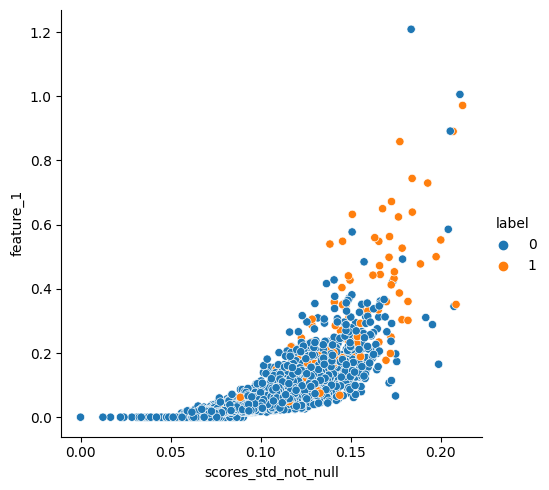

In [21]:
sns.relplot(data = df,
            x = "scores_std_not_null",
            y = "feature_1",
            hue = 'label')

In [22]:
# for column in df[feature_cols].columns:
#     sns.relplot(data = df,
#         x = "scores_std_not_null",
#         y = column,
#         hue = 'label')

In [23]:
# feature_cols = ['scores_mean',
#        'scores_max', 'scores_second_max', 'scores_min', 'scores_median',
#        'shape', 'scores_len_not_null_normalized', 'scores_std',
#        'scores_std_not_null', 'scores_window_5_mean', 'scores_window_5_min',
#        'scores_window_5_median', 'scores_window_5_std', 'scores_window_2_mean',
#        'scores_window_2_min', 'scores_window_2_median', 'scores_window_2_std',
#        'scores_window_10_mean', 'scores_window_10_min',
#        'scores_window_10_median', 'scores_window_10_std', 'squares_mean',
#        'squares_max', 'squares_second_max', 'squares_min', 'squares_median',
#        'squares_len_not_null_normalized', 'squares_std',
#        'squares_std_not_null', 'squares_window_5_mean', 'squares_window_5_min',
#        'squares_window_5_median', 'squares_window_5_std',
#        'squares_window_2_mean', 'squares_window_2_min',
#        'squares_window_2_median', 'squares_window_2_std',
#        'squares_window_10_mean', 'squares_window_10_min',
#        'squares_window_10_median', 'squares_window_10_std',
#        'scores_diff_desp', 'scores_diff_std',
#        'scores_diff_mean', 'scores_diff_nul', 'scores_diff_two',
#        'scores_diff_sort', 'squares_diff_desp', 'squares_diff_std',
#        'squares_diff_mean', 'squares_diff_nul', 'squares_diff_two',
#        'squares_diff_sort',
#        'scores_diff_desp_not_null', 'scores_diff_std_not_null',
#        'scores_diff_mean_not_null', 'scores_diff_nul_not_null',
#        'scores_diff_two_not_null', 'scores_diff_sort_not_null',
#        'squares_diff_desp_not_null', 'squares_diff_std_not_null',
#        'squares_diff_mean_not_null', 'squares_diff_nul_not_null',
#        'squares_diff_two_not_null', 'squares_diff_sort_not_null',
#          'squares_max_index', 'scores_max_index', 'delta_index', 'dev_index',
#          'dev_scores_squares','scores_count_0.05', 'scores_count_0.1',
#        'scores_count_0.15', 'scores_count_0.2', 'squares_count_0.05',
#        'squares_count_0.1', 'squares_count_0.15', 'squares_count_0.2',
#         'scores_max_window_len_35', 'scores_max_window_len_40',
#        'scores_max_window_len_45', 'scores_max_window_len_50',
#        'scores_max_window_len_55']

# feature_cols = ['scores_mean',
#        'scores_max', 'scores_min', 'scores_median', 'scores_std',
#        'scores_std_not_null', 'squares_mean', 'squares_max', 'squares_min',
#        'squares_median', 'squares_std', 'squares_std_not_null']

# feature_cols = ['scores_mean',
#        'scores_max', 'scores_second_max', 'scores_min', 'scores_median', 
#             'scores_len_not_null_normalized', 'scores_std',
#        'scores_std_not_null', 'scores_window_5_mean', 'scores_window_5_min',
#        'scores_window_5_median', 'scores_window_5_std', 'scores_window_2_mean',
#        'scores_window_2_min', 'scores_window_2_median', 'scores_window_2_std',
#        'scores_window_10_mean', 'scores_window_10_min',
#        'scores_window_10_median', 'scores_window_10_std', 'squares_mean',
#        'squares_max', 'squares_second_max', 'squares_min', 'squares_median',
#        'squares_len_not_null_normalized', 'squares_std',
#        'squares_std_not_null', 'squares_window_5_mean', 'squares_window_5_min',
#        'squares_window_5_median', 'squares_window_5_std',
#        'squares_window_2_mean', 'squares_window_2_min',
#        'squares_window_2_median', 'squares_window_2_std',
#        'squares_window_10_mean', 'squares_window_10_min',
#        'squares_window_10_median', 'squares_window_10_std',
#        'scores_diff_desp', 'scores_diff_std',
#        'scores_diff_mean', 'squares_diff_desp', 'squares_diff_std',
#        'squares_diff_mean',
#        'scores_diff_desp_not_null', 'scores_diff_std_not_null',
#        'scores_diff_mean_not_null',
#        'squares_diff_desp_not_null', 'squares_diff_std_not_null',
#        'squares_diff_mean_not_null']

feature_cols = ['scores_mean',
       'scores_max', 'scores_median', 'scores_std',
       'scores_std_not_null', 'shape', #"scores_perc_90",
                "feature_1", #"scores_second_max",
                #"feature_2",# "feature_3",
       'squares_max', 'squares_median',
       'squares_std_not_null',]

save_cols = ["label", "fold",
       'scores_mean',
       'scores_max', 'scores_median', 'scores_std',
       'scores_std_not_null', 'shape', "feature_1",
       'squares_max', 'squares_median',
       'squares_std_not_null',]

In [24]:
# df[df.fold != i].label

In [34]:
df.to_csv("wtf.csv")

In [25]:
import numpy as np
import pandas as pd
import pandas.api.types
from sklearn.metrics import log_loss
import torch
import torch.nn as nn
import torch.nn.functional as F

class ParticipantVisibleError(Exception):
    pass


def normalize_probabilities_to_one(df: pd.DataFrame, group_columns) -> pd.DataFrame:
    # Normalize the sum of each row's probabilities to 100%.
    # 0.75, 0.75 => 0.5, 0.5
    # 0.1, 0.1 => 0.5, 0.5
    row_totals = df[group_columns].sum(axis=1)
    if row_totals.min() == 0:
        raise ParticipantVisibleError('All rows must contain at least one non-zero prediction')
    for col in group_columns:
        df[col] /= row_totals
    return df


def score(solution: pd.DataFrame, submission: pd.DataFrame, row_id_column_name: str) -> float:
    '''
    Pseudocode:
    1. For every label group (liver, bowel, etc):
        - Normalize the sum of each row's probabilities to 100%.
        - Calculate the sample weighted log loss.
    2. Derive a new any_injury label by taking the max of 1 - p(healthy) for each label group
    3. Calculate the sample weighted log loss for the new label group
    4. Return the average of all of the label group log losses as the final score.
    '''
    del solution[row_id_column_name]
    del submission[row_id_column_name]

    # Run basic QC checks on the inputs
    if not pandas.api.types.is_numeric_dtype(submission.values):
        raise ParticipantVisibleError('All submission values must be numeric')

    if not np.isfinite(submission.values).all():
        raise ParticipantVisibleError('All submission values must be finite')

    if solution.min().min() < 0:
        raise ParticipantVisibleError('All labels must be at least zero')
    if submission.min().min() < 0:
        raise ParticipantVisibleError('All predictions must be at least zero')

    # Calculate the label group log losses
    binary_targets = ['bowel', 'extravasation']
    triple_level_targets = ['kidney', 'liver', 'spleen']
    all_target_categories = binary_targets + triple_level_targets

    label_group_losses = []
    for category in all_target_categories:
        if category in binary_targets:
            col_group = [f'{category}_healthy', f'{category}_injury']
        else:
            col_group = [f'{category}_healthy', f'{category}_low', f'{category}_high']

        solution = normalize_probabilities_to_one(solution, col_group)

        for col in col_group:
            if col not in submission.columns:
                raise ParticipantVisibleError(f'Missing submission column {col}')
        submission = normalize_probabilities_to_one(submission, col_group)
        label_group_losses.append(
            sklearn.metrics.log_loss(
                y_true=solution[col_group].values,
                y_pred=submission[col_group].values,
                sample_weight=solution[f'{category}_weight'].values
            )
        )

    # Derive a new any_injury label by taking the max of 1 - p(healthy) for each label group
    healthy_cols = [x + '_healthy' for x in all_target_categories]
    any_injury_labels = (1 - solution[healthy_cols]).max(axis=1)
    any_injury_predictions = (1 - submission[healthy_cols]).max(axis=1)
    any_injury_loss = sklearn.metrics.log_loss(
        y_true=any_injury_labels.values,
        y_pred=any_injury_predictions.values,
        sample_weight=solution['any_injury_weight'].values
    )

    label_group_losses.append(any_injury_loss)
    return np.mean(label_group_losses)

class Metric():
    def __init__(
        self,
        label : int
    ):
        self.label = label
        self.label_to_class = {1 : 'liver',
                               2 : 'spleen',
                               3 : 'kidney',
                               4 : 'bowel',
                               5 : 'extravasation'}
        
        self.label_to_weights = {1 : [1, 2, 4],
                                 2 : [1, 2, 4],
                                 3 : [1, 2, 4],
                                 4 : [1, 2],
                                 5 : [1, 6]}
        
        self.label_weights = self.label_to_weights[label]
        
        
    def get_weights(self, true):
        if len(self.label_weights) == 2:
            weights = [self.label_weights[0] if i == 0 else self.label_weights[1] for i in true]
        else:
            weights = []
            for row in true:
                i = np.where(row == 1)[0][0]
                weights.append(self.label_weights[i])
        return weights
    
    
    def normalize_probabilities_to_one(self, pred: np.array) -> np.array:
        # Normalize the sum of each row's probabilities to 100%.
        # 0.75, 0.75 => 0.5, 0.5
        # 0.1, 0.1 => 0.5, 0.5
        row_totals = pred.sum(axis=1)
        pred_new = np.moveaxis(pred, 0, -1)
        if row_totals.min() == 0:
            raise ParticipantVisibleError('All rows must contain at least one non-zero prediction')
        for i in range(pred.shape[1]):
            pred_new[i] /= row_totals
        pred_new = np.moveaxis(pred_new, 0, -1)
        return pred_new
    
    
    def get_score(self, true, pred, normalize=True):
        weights = self.get_weights(true)
        pred = self.normalize_probabilities_to_one(pred)
        score = log_loss(
                        y_true=true,
                        y_pred=pred,
                        normalize=normalize,
                        sample_weight=weights
                        )
        return score
    
    def get_class(self):
        return self.label_to_class[self.label]

In [26]:
from joblib import dump, load
import pickle

In [27]:
# df_new = pd.concat([df[df.label == 1], df[df.label == 0][:1000]])
# pids = df_new.patient_id.unique()
# labels = []
# for p in pids:
#     labels.append(df_new[df_new.patient_id == p].label.max())
# # df["fold"] = 0
# for i, (train_index, test_index) in enumerate(skf.split(pids, labels)):
#     print(f"Fold {i}:")
#     ids = pids[test_index]
#     df_new['fold'] = df_new.apply(lambda x: i if x.patient_id in ids else x.fold, axis=1)

In [28]:
# df_new.fold.value_counts()

In [29]:
# df_new = pd.read_csv("extr_models/data/shifted_labels.csv")

In [30]:
# np.random.rand() * 5*1e-3df[df.fold != i]

In [ ]:
Score = Metric(label = 5)

for i in range(N_SPLITS):
    X_train = df[feature_cols][df.fold != i]
    y_train = df[df.fold != i].label.tolist()
    X_val = df[feature_cols][df.fold == i]
    y_val = df[df.fold == i].label.tolist()
    
    LR = LogisticRegression(random_state=21,
                            penalty='elasticnet',
                            class_weight={0 : 1, 1 : 6},
                             solver="saga",
                            l1_ratio=0.9)

    BRF = BalancedRandomForestClassifier(n_estimators=100,
                                         criterion="gini",
                                         max_depth=None,
                                         min_samples_split=2,
                                         min_samples_leaf=1,
                                         min_weight_fraction_leaf=0.,
                                         max_features='sqrt',
                                         max_leaf_nodes=None,
                                         min_impurity_decrease=0.,
                                         bootstrap=True,
                                         oob_score=False,
                                         sampling_strategy="auto",
                                         replacement=False,
                                         random_state=21,
                                         verbose=0,
                                         warm_start=False,
                                         class_weight={0 : 1, 1 : 6},
                                         ccp_alpha=0.,
                                         max_samples=None
                                        )

    fit_LR = LR.fit(X_train, y_train)
    fit_BRF = BRF.fit(X_train, y_train)
    
    f1 = f1_score(df[feature_cols][df.fold == i].label, fit_LR.predict(df[feature_cols][df.fold == i]))
    
    true = np.array(df[feature_cols][df.fold == i].label)
    pred_LR = np.array(fit_LR.predict_proba(df[feature_cols][df.fold == i]))
    pred_BRF = np.array(fit_BRF.predict_proba(df[feature_cols][df.fold == i]))
    pred = 0.5 * pred_BRF + 0.5 * pred_LR
    val_score = Score.get_score(true, pred)
    val_scores.append(val_score)
    
    print(f'fold: {i}')
    print(f'f1 val score: {f1}')
    print(f'w_logloss full dataset score: {full_score}')
    print(f'w_logloss val score: {val_score}')
    print()

In [35]:
Score = Metric(label = 5)
df_for_fit = df_new
pred_df = pd.DataFrame(0, index=np.arange(df.shape[0]), columns=['BRF', 'LR', "BRF_s", "LR_s"])
pred_df['fold'] = df['fold'].copy()
val_scores = []


for i in range(N_SPLITS):
    # X_train = df_new[df_new.fold != i][feature_cols]# + (np.random.rand() * 1e-1)
    # y_train = df_new[df_new.fold != i]["label"]
    # X_val = df_new[df_new.fold == i][feature_cols]
    # y_val = df_new[df_new.fold == i]["label"]

    LR = LogisticRegression(random_state=21,
                            penalty='elasticnet',
                            class_weight={0 : 1, 1 : 6},
                             solver="saga",
                            l1_ratio=0.9)

    BRF = BalancedRandomForestClassifier(n_estimators=100,
                                         criterion="gini",
                                         max_depth=None,
                                         min_samples_split=2,
                                         min_samples_leaf=1,
                                         min_weight_fraction_leaf=0.,
                                         max_features='sqrt',
                                         max_leaf_nodes=None,
                                         min_impurity_decrease=0.,
                                         bootstrap=True,
                                         oob_score=False,
                                         sampling_strategy="auto",
                                         replacement=False,
                                         random_state=21,
                                         verbose=0,
                                         warm_start=False,
                                         class_weight={0 : 1, 1 : 6},
                                         ccp_alpha=0.,
                                         max_samples=None
                                        )

    
#     fit_LR = LR.fit(df_new[feature_cols][df_new.fold != i], df_new[df_new.fold != i].label)
#     fit_BRF = BRF.fit(df_new[feature_cols][df_new.fold != i], df_new[df_new.fold != i].label)
    
    fit_LR = LR.fit(df[feature_cols][df.fold != i], df[df.fold != i].label)
    fit_BRF = BRF.fit(df[feature_cols][df.fold != i], df[df.fold != i].label)

    
    # LR_pickle = f"extr_models/LR_fold_{i}.pkl"
    # with open(LR_pickle, "wb") as f:
    #     pickle.dump(fit_LR, f)
    # BRF_pickle = f"extr_models/BRF_fold_{i}.pkl"
    # with open(BRF_pickle, "wb") as f:
    #     pickle.dump(BRF_pickle, f)
        
        
    # LR_pickle = f"extr_models/LR_fold_{i}.pkl"
    # with open(LR_pickle, "rb") as f:
    #     fit_LR = pickle.load(f)
    # BRF_pickle = f"extr_models/BRF_fold_{i}.pkl"
    # with open(BRF_pickle, "rb") as file:
    #     fit_BRF = pickle.load(file)
    
    # fit_LR = load(f"extr_models/LR_fold_{i}.pkl")
    # fit_LR_full = load(f"extr_models/LR_shifted_fold_{i}.pkl")
    # fit_BRF_full = load(f"extr_models/BRF_fold_{i}.pkl")
    # fit_BRF = load(f"extr_models/BRF_shifted_fold_{i}.pkl")
    
    # dump(fit_LR, f'extr_models/LR_shifted_fold_{i}.pkl') 
    # dump(fit_BRF_full, f'extr_models/BRF_fold_{i}.pkl')
    # dump(fit_BRF, f'extr_models/BRF_shifted_fold_{i}.pkl')

    
    f1 = f1_score(df[feature_cols][df.fold == i].label, fit_LR.predict(df[feature_cols][df.fold == i]))
    # mask = np.array(df.fold == i)
    # print(fit_LR_full.predict_proba(df[feature_cols][df.fold == i]))
    # print(fit_LR.predict_proba(df[feature_cols][df.fold == i]))
    # print(mask)
    # print()
    # rand = np.random.rand() * 5*1e-3
    # pred_df["LR"] += (fit_LR_full.predict_proba(df[feature_cols]).T[0] * mask)# / N_SPLITS
    # pred_df["BRF"] += (fit_BRF_full.predict_proba(df[feature_cols]).T[0] * mask)# / N_SPLITS
    # pred_df["LR_s"] += (fit_LR.predict_proba(df[feature_cols] + rand).T[0] * mask)# / N_SPLITS
    # pred_df["BRF_s"] += (fit_BRF.predict_proba(df[feature_cols] + rand).T[0] * mask)# / N_SPLITS
    # pred_df.loc[pred_df.fold == i] += (0.2 * fit_LR.predict_proba(df[df.fold == i][feature_cols]).T[0] + 0.8 * fit_LR_full.predict_proba(df[df.fold == i][feature_cols]).T[0]) / N_SPLITS
    # pred_df.loc[pred_df.fold == i] += (0.2 * fit_BRF.predict_proba(df[df.fold == i][feature_cols]).T[0] + 0.8 * fit_BRF_full.predict_proba(df[df.fold == i][feature_cols]).T[0]) / N_SPLITS
    
#     true = np.array(df_for_fit["label"])
#     pred_LR = np.array(fit_LR.predict_proba(df_for_fit[feature_cols]))
#     pred_BRF = np.array(fit_BRF.predict_proba(df_for_fit[feature_cols]))
#     pred = 0.5 * pred_BRF + 0.5 * pred_LR
#     full_score = Score.get_score(true, pred)
    
    true = np.array(df[feature_cols][df.fold == i].label)
    pred_LR = np.array(fit_LR.predict_proba(df[feature_cols][df.fold == i]))
    pred_BRF = np.array(fit_BRF.predict_proba(df[feature_cols][df.fold == i]))
    pred = 0.5 * pred_BRF + 0.5 * pred_LR
    val_score = Score.get_score(true, pred)
    val_scores.append(val_score)

#     print(f'fold: {i}')
#     print(f'f1 val score: {f1}')
#     print(f'w_logloss full dataset score: {full_score}')
#     print(f'w_logloss val score: {val_score}')
#     print()
# print(f"mean val score: {np.mean(val_scores)} +- {2 * np.std(val_scores)}")

# fit_LR = LR.fit(df_for_fit[feature_cols], df_for_fit['label'])
# fit_BRF = BRF.fit(df_for_fit[feature_cols], df_for_fit['label'])
# fit_LR = load(f"extr_models/LR_full.pkl")
# fit_BRF = load(f"extr_models/BRF_full.pkl")

# dump(fit_LR, f'extr_models/LR_shifted_full.pkl') 
# dump(fit_BRF, f'extr_models/BRF_full.pkl')

# f1 = f1_score(df_for_fit['label'], fit_LR.predict(df_for_fit[feature_cols]))
# true = np.array(df_for_fit["label"])
# pred_LR = np.array(fit_LR.predict_proba(df_for_fit[feature_cols]))
# pred_BRF = np.array(fit_BRF.predict_proba(df_for_fit[feature_cols]))
# pred = 0.5 * pred_BRF + 0.5 * pred_LR
# full_score = Score.get_score(true, pred)

# print(f"all data score: {full_score}")

AttributeError: 'DataFrame' object has no attribute 'label'

In [31]:
pred_df["label"] = df.label.tolist()
# pred_df["fold"] = df_for_fit.fold.tolist()
pred_df.head()

,BRF,LR,BRF_s,LR_s,fold,label
0,0.28,0.033668,0.08,0.095233,2,1
1,0.67,0.713542,0.86,0.877609,2,0
2,0.59,0.519795,0.54,0.749275,2,0
3,0.67,0.451600,0.68,0.697860,1,0
4,0.47,0.581988,0.57,0.778287,3,0


In [37]:
pred_df["pred_score"] = 0.8 * (0.5 * pred_df.BRF + 0.5 * pred_df.LR) + 0.2 * (0.5 * pred_df.BRF_s + 0.5 * pred_df.LR_s)
pred_df["pred_score_t"] = pred_df.pred_score.apply(lambda x: [x, (1-x)])
pred_df["pred_score"] = pred_df.pred_score.apply(lambda x: [x * 2.25, (1-x) * 1])
true = np.array(pred_df.label)
pred = np.array(pred_df.pred_score.tolist())

print(Score.get_score(np.array(pred_df.label), np.array(pred_df.pred_score.tolist())))
print(Score.get_score(np.array(df[df.fold==0].label), np.array(pred_df[pred_df.fold==0].pred_score.tolist())))

0.4922603809056777
0.4446820614126243


In [39]:
extr_preds = pd.DataFrame([df.patient_id, pred_df["pred_score_t"]]).T

In [40]:
extr_preds.to_csv("data/extr_preds.csv", index=False)

In [129]:
# 'f0': 0.001, 'f1': 0.263, 'f2': 0.882
# 'f0': 0.001, 'f1': 0.046, 'f2': 0.91
# 'f0': 0.877, 'f1': 0.381

In [130]:
import optuna
from functools import partial

def objective(trial, y_true, pred_df):
    pred = pred_df.copy()
    f0 = trial.suggest_float('f0', 0., 20., step=0.1)
    f1 = trial.suggest_float('f1', 0., 20., step=0.1)
    
    pred['pred_score'] = 0.8 * (0.5 * pred_df.BRF + 0.5 * pred_df.LR) + 0.2 * (0.5 * pred_df.BRF_s + 0.5 * pred_df.LR_s)
    sc = np.array(pred.pred_score.apply(lambda x: [x * f0, (1-x) * f1]).tolist())
    
    score = Metric(label=5).get_score(y_true, sc)
    return score

study = optuna.create_study(direction='minimize')

# i=0
# fit_LR = LR.fit(df_for_fit[(df_for_fit.fold != i)][feature_cols]  - (np.random.rand() * 0.05), df_for_fit[(df_for_fit.fold != i)]['label'])
# fit_BRF = BRF.fit(df_for_fit[(df_for_fit.fold != i)][feature_cols], df_for_fit[(df_for_fit.fold != i)]['label'])
# true = np.array(df_for_fit[df_for_fit.fold == i]["label"])
# pred_LR = np.array(fit_LR.predict_proba(df_for_fit[df_for_fit.fold == i][feature_cols]))
# pred_BRF = np.array(fit_BRF.predict_proba(df_for_fit[df_for_fit.fold == i][feature_cols]))
# pred = 0.5 * pred_BRF + 0.5 * pred_LR
# val_score = Score.get_score(true, pred)
# print(val_score)

objective_partial = partial(objective, y_true=true, pred_df=pred_df)
study.optimize(objective_partial, n_trials=1000)

best_params = study.best_params
print(f'Best parameters: {best_params}')

[I 2023-10-12 10:11:14,731] A new study created in memory with name: no-name-a4bd7020-9b9b-45ef-99a8-2a2c3a754a4e
[I 2023-10-12 10:11:14,738] Trial 0 finished with value: 0.5176606182132886 and parameters: {'f0': 10.700000000000001, 'f1': 8.0}. Best is trial 0 with value: 0.5176606182132886.
[I 2023-10-12 10:11:14,743] Trial 1 finished with value: 0.49291752376767145 and parameters: {'f0': 17.900000000000002, 'f1': 7.5}. Best is trial 1 with value: 0.49291752376767145.
[I 2023-10-12 10:11:14,748] Trial 2 finished with value: 0.8914058959761955 and parameters: {'f0': 5.5, 'f1': 18.7}. Best is trial 1 with value: 0.49291752376767145.
[I 2023-10-12 10:11:14,753] Trial 3 finished with value: 0.5060376526464995 and parameters: {'f0': 16.900000000000002, 'f1': 4.9}. Best is trial 1 with value: 0.49291752376767145.
[I 2023-10-12 10:11:14,757] Trial 4 finished with value: 0.5520456098163802 and parameters: {'f0': 17.400000000000002, 'f1': 3.1}. Best is trial 1 with value: 0.49291752376767145.


Best parameters: {'f0': 18.5, 'f1': 8.1}


In [ ]:
0.983 = 0.45
0.99 = 0.4874
0.773 = 0.5264
0.942 = 0.4978
